# Rainbow

In this example we'll attempt to model what happens inside a drop of water to form a rainbow. In reality, at each surface boundary rays are always split between refracting and reflecting. However, there is a "main path" that consists or refraction, reflection and refraction. This is what forms the rainbow phenomenon and we will model only this path here.

Thanks to tlm optional 2D or 3D capability, we will be able to reproduce this 2D diagram from Wikipedia, but also simulate the path of light in the full 3D spherical drop of water.

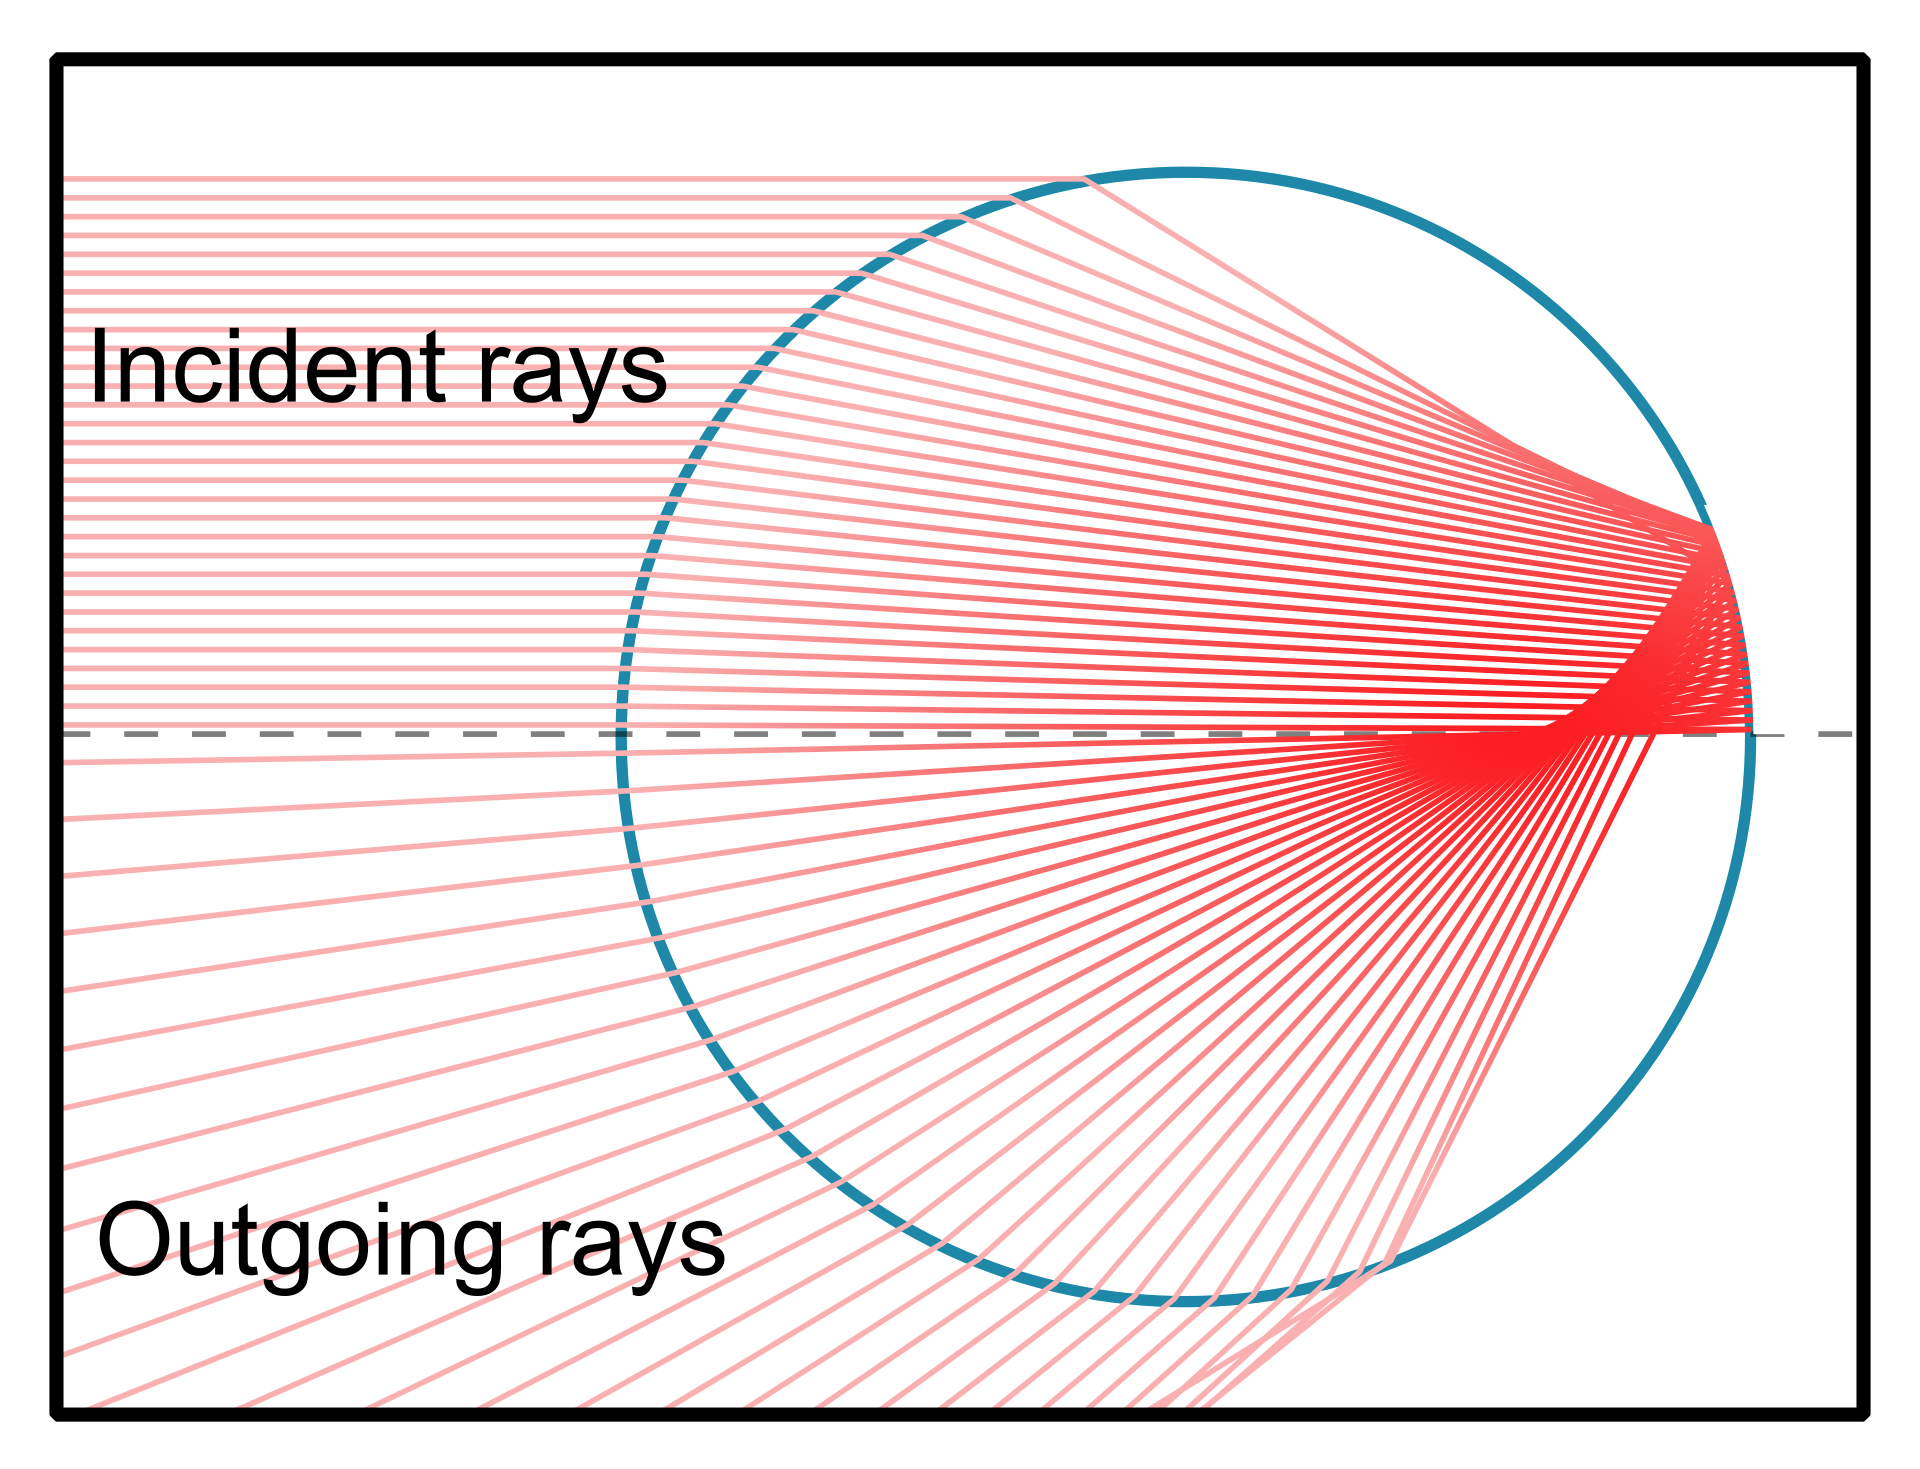

In [ ]:
import torchlensmaker as tlm
import torch

# Half sphere
halfsphere = tlm.Sphere3(diameter=10, r=5)

model = tlm.Sequential(
    # Position the light source just above the optical axis
    tlm.Offset(
        tlm.PointSourceAtInfinity(10),
        y=5),
    tlm.Wavelength(400, 800),
    tlm.Gap(10),

    # The first refracting surface is the top half sphere
    tlm.Rotate(
        tlm.RefractiveSurface(halfsphere, material="water", anchors=("extent", "origin")),
        [-90, 0]),

    tlm.Rotate(
        tlm.ReflectiveSurface(halfsphere, anchors=("extent", "origin")),
        [-180, 0]),

    tlm.Rotate(
        tlm.RefractiveSurface(halfsphere, material="air", anchors=("extent", "origin")),
        [0, 0]),
)

tlm.show2d(model, sampling={"base": 50, "wavelength": 15}, end=50)
tlm.export_json(model, "rainbow.json", sampling={"base": 5, "wavelength": 3}, end=50)
#tlm.show3d(model, sampling={"base": 300, "wavelength": 10})

In [ ]:
import torchlensmaker as tlm
import torch

def extent(r, K):
    r2 = r**2
    d = 1 - r2 * K**2
    return d

def extent2(r, K):
    d = 1 - (r * K)**2
    return d

print(extent(10/2, 1/5))
print(extent2(10/2, 1/5))
print(extent(50/2, 1/25))